# Image Prediction Project

In [2]:
#Import Required Library
import pandas as pd
import numpy as np
from matplotlib import image 
import matplotlib.pyplot as plt
from skimage.io import imread
import seaborn as sns

from PIL import Image
import cv2
import os

In [3]:
%%time
Datadir = r'F:\Machine Learning Project\Handwritten prediction ml project\mnist\New folder'
categories = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

target = []
flat_data = []

for category in categories:
    target_label = category
    path = os.path.join(Datadir,category)
    
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        flat_data.append(img_array.flatten())
        target.append(target_label)

raw_data = np.array(flat_data)
target = np.array(target)

Wall time: 5min 38s


In [7]:
#
np.unique(target,return_counts=True)

(array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
        'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
       dtype='<U1'),
 array([13870,  8668, 23409, 10134, 11440,  1163,  5762,  7218,  1120,
         8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812, 11566,
        48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076],
       dtype=int64))

In [8]:
image_df = pd.DataFrame(raw_data)

In [6]:
image_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
image_df['label']= target

In [10]:
# Save the data to excel
image_df.to_csv(r'C:\Data\image_dataframe.csv')

Wall time: 0 ns


In [11]:
#image_df = pd.read_csv(r'C:\Data\image_dataframe.csv')
#image_df.drop('Unnamed: 0',axis=1,inplace=True)
#image_df

In [11]:
image_df['label'].value_counts()

O    57825
S    48419
U    29008
C    23409
T    22495
P    19341
N    19010
A    13870
M    12336
L    11586
R    11566
E    11440
Y    10859
W    10784
D    10134
B     8668
J     8493
H     7218
X     6272
Z     6076
Q     5812
G     5762
K     5603
V     4182
F     1163
I     1120
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

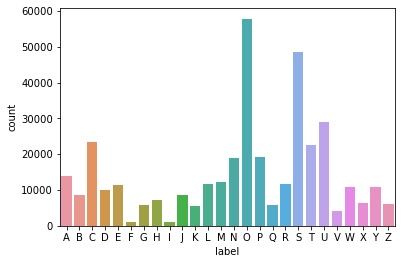

In [12]:
sns.countplot(data=image_df,x='label')

In [14]:
y = image_df['label']
X = image_df.drop('label',axis=1)

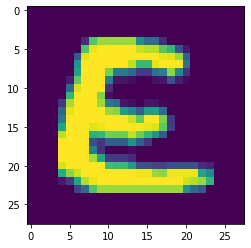

In [28]:
#Converting array into image 
img = np.reshape(X.values[56743],(28,28))
plt.imshow(img)

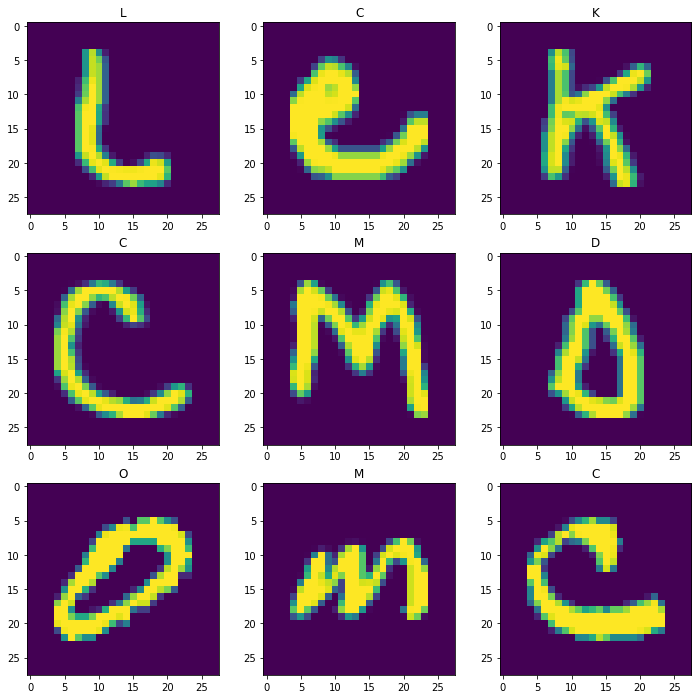

In [30]:
plt.figure(figsize=(12, 12))
idx = np.random.randint(0, 156478, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    plt.title(y[idx[i]])
    img_grid = np.reshape(X.values[idx[i]], (28,28))
    plt.imshow(img_grid)

# Train test split

In [15]:
#Spliting the data into train and test in (80:20) ratio
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=786)

In [16]:
X_train.shape

(297960, 784)

In [17]:
y_train.shape

(297960,)

In [18]:
X_test.shape

(74491, 784)

In [19]:
y_test.shape

(74491,)

# Model Creation & Training

## Logistic Regression

In [18]:
%%time
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Wall time: 7min 41s


LogisticRegression()

## Prediction 


In [19]:
y_test_pred_LR = classifier.predict(X_test)


## Measuring Performance

### Accuracy

In [20]:
from sklearn import metrics

metrics.accuracy_score(y_test,y_test_pred_LR)

0.8771932179726409

# Decision Tree Classifier  

In [22]:
%%time
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train,y_train)

y_test_pred_DT = dt_classifier.predict(X_test)

metrics.accuracy_score(y_test,y_test_pred_DT)

Wall time: 3min 39s


0.9545045710220027

# KNN classification

In [13]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)

y_test_pred_KNN = knn_classifier.predict(X_test)

from sklearn import metrics

metrics.accuracy_score(y_test,y_test_pred_KNN)

NameError: name 'X_train' is not defined

# Random Forest

In [9]:
%%time
from sklearn.ensemble import RandomForestClassifier
Rf_classifier = RandomForestClassifier()
Rf_classifier.fit(X_train,y_train)

y_test_pred_RF = Rf_classifier.predict(X_test)

from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pred_RF)

Wall time: 8min 52s


0.9869245949175068